## Saliency Project
by Jesse Torija

### Libraries 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import circstd
from scipy.signal import fftconvolve, convolve2d
from helper import gaussian_filter

### Functions

In [3]:
# Funtion to plot four figures in a 2 by 2
def four_by_four(img,headers,Original_titile):
    plt.figure(figsize = (15,10))
    plt.subplot(2,2,1) , plt.imshow(img) , plt.title(Original_titile)
    j = 0
    while j < 3 :
        plt.subplot(2,2,j+2)
        plt.imshow(img[:,:,j], cmap = 'gray')
        plt.title(headers[j] + ' channel')
        j = j + 1
    return

In [4]:
#Convert image channels to vectors
def channel_corr(img):
    width, height, channels = img.shape #properties of image stored into img.shape
    img_vector = np.zeros((channels,width*height)) #np.shape is the shape of new array to store vectors
    #load the channels and corresponding values into one array for width and height
    for i in range(channels):
        img_vector[i,:] = img[:,:,i].flatten()
    return np.corrcoef(img_vector)

In [5]:
#correlation map
def pairwise_graph(img_corr):
    plt.figure(figsize = (12,7))
    plt.imshow(img_corr),plt.colorbar()
    plt.xticks(range(3), ["Red", "Green", "Blue"]),plt.yticks(range(3), ["Red", "Green", "Blue"])
    return

In [6]:
# extract patches and remove side pathces of images
def extract_patches(img,patchsize,pixel_x,pixel_y):
    height, width = img.shape
    assert(np.remainder(patchsize,2))
    half_patch = int(patchsize/2)
    assert(pixel_x-half_patch>-1)
    assert(pixel_x+half_patch<=height)
    assert(pixel_y-half_patch>-1)
    assert(pixel_y+half_patch<=width)
    return img[(pixel_x-half_patch):(pixel_x+half_patch+1), (pixel_y-half_patch):(pixel_y+half_patch+1)]               

### Part 1

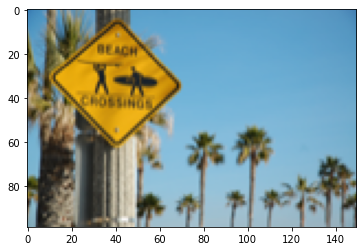

In [8]:
img = plt.imread('/Users/torijamaximoj2/Desktop/salience_08.png')
plt.imshow(img)
height, width, channels = img.shape

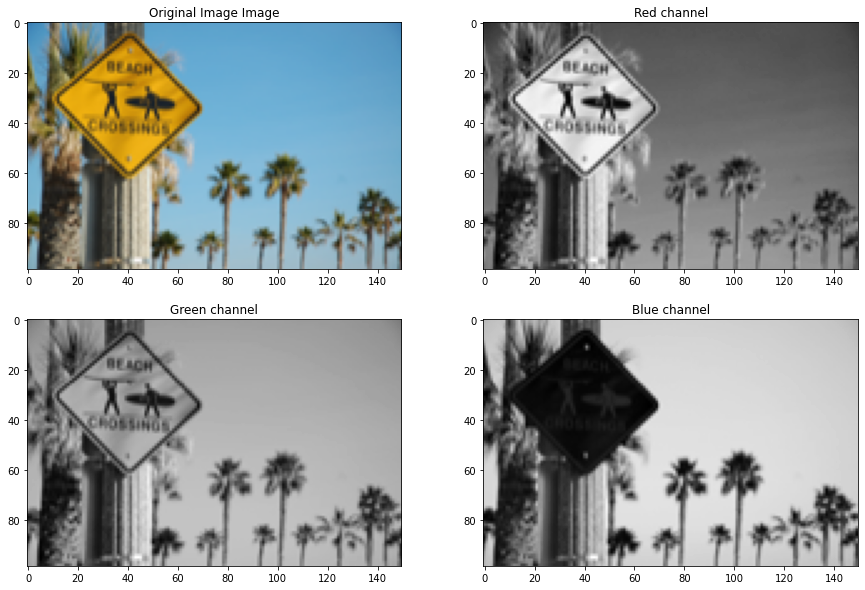

In [9]:
color = ["Red", "Green", "Blue"]
name_1 = 'Original Image Image'
four_by_four(img,color,name_1)

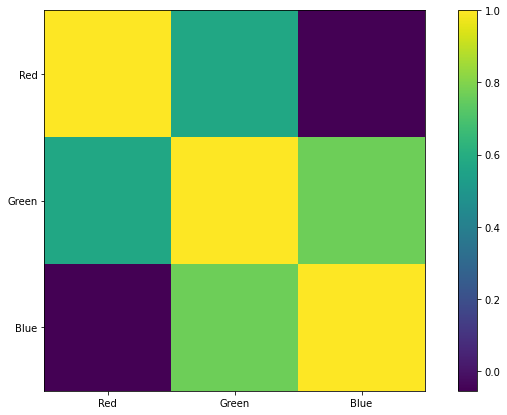

In [11]:
img_corr = channel_corr(img)
pairwise_graph(img_corr)

Is there anything striking in the correlation? The lowest correlation is between blue-red and red-blue while the highest correlation is between the same color channels. 

Why is this not surprising? Do to basic colors such as black and gray that are present everywhere it is less likely to see strong bright colors like blue and red. 

### Part 2

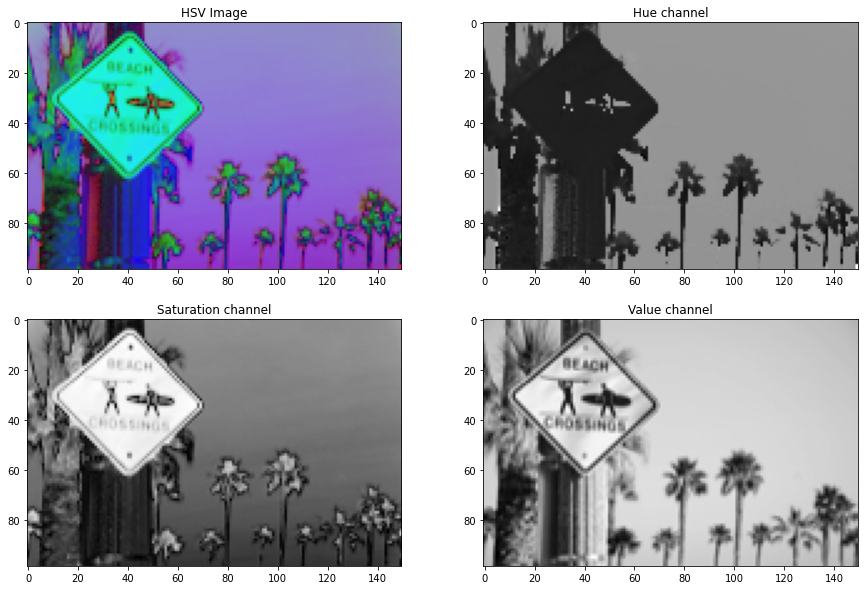

In [12]:
img_hsv = colors.rgb_to_hsv(img)
hsv_list = ["Hue", "Saturation", "Value"]
name_2 = 'HSV Image'
four_by_four(img_hsv,hsv_list,name_2)

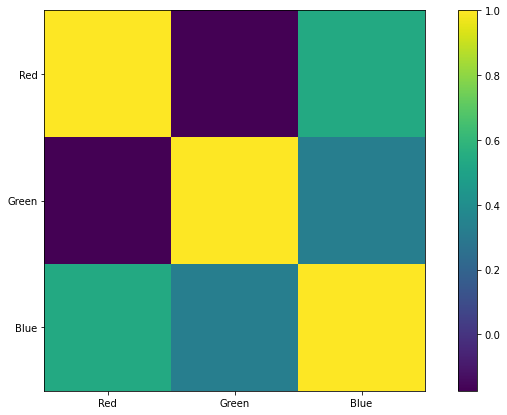

In [13]:
img_corr_hsv = channel_corr(img_hsv)
pairwise_graph(img_corr_hsv)

Why is there less correlation now? Comapring features not colors 

### Part 3 

In [14]:
hue_channel = img_hsv[:,:,0]
saturation_channel = img_hsv[:,:,1]
value_channel = img_hsv[:,:,2]

In [15]:
patchsize = 15
ignore_pixels = int(15/2)
img_sal = np.zeros((height-patchsize, width-patchsize, channels))
print(img_sal.shape)

(84, 135, 3)


In [16]:
for i in range(img_sal.shape[0]): 
    for j in range(img_sal.shape[1]): 
        pixel_x = i + ignore_pixels
        pixel_y = j + ignore_pixels
        patch_hue = extract_patches(hue_channel,patchsize,pixel_x,pixel_y)
        patch_saturation = extract_patches(saturation_channel,patchsize,pixel_x,pixel_y)
        patch_value = extract_patches(value_channel,patchsize,pixel_x,pixel_y)
        img_sal[i, j, 0] = circstd(patch_hue, high=1)
        img_sal[i, j, 1] = np.std(patch_saturation)
        img_sal[i, j, 2] = np.std(patch_value)       

### Part 4

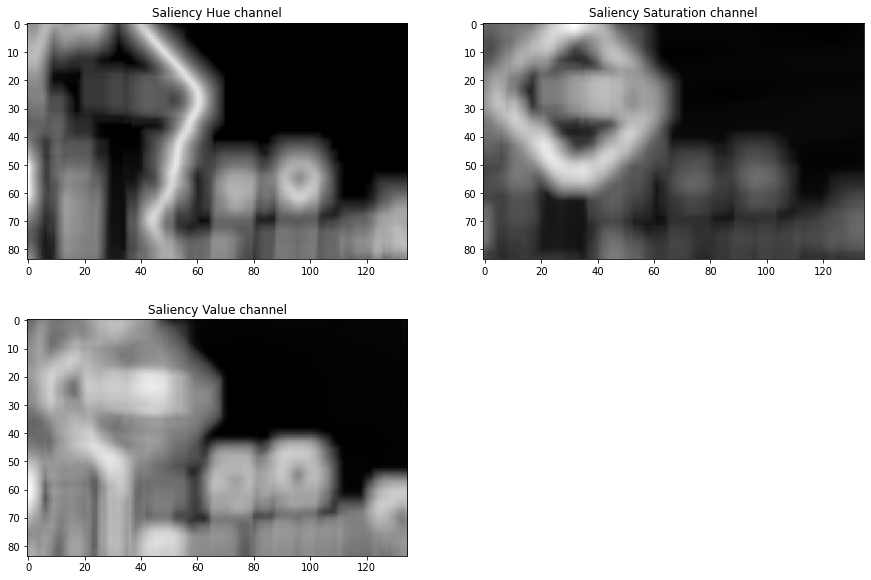

In [17]:
plt.figure(figsize=(15,10))
names = ["Hue", "Saturation", "Value"]
k = 0
while k < 3 :
    plt.subplot(2,2,k+1)
    plt.imshow(img_sal[:,:,k], cmap = 'gray')
    plt.title('Saliency ' + names[k] + ' channel')
    k = k + 1

### Part 5

Text(0.5, 1.0, 'The joint saliency map')

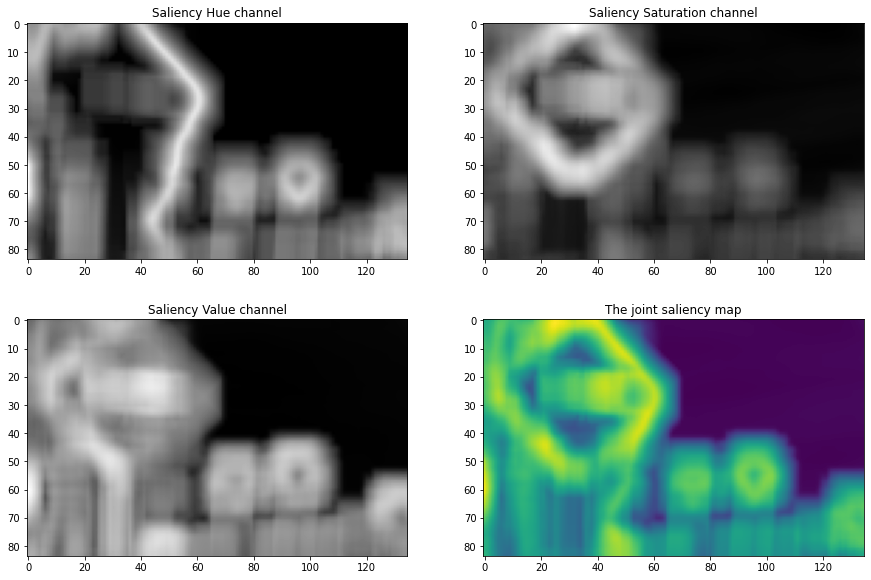

In [18]:
plt.figure(figsize=(15,10))
names = ["Hue", "Saturation", "Value"]
k = 0
while k < 3 :
    plt.subplot(2,2,k+1)
    plt.imshow(img_sal[:,:,k], cmap = 'gray')
    plt.title('Saliency ' + names[k] + ' channel')
    k = k + 1
    
sal_map = img_sal.sum(axis=2)
plt.subplot(224)
plt.imshow(sal_map)
plt.title("The joint saliency map")

How is each of the images related to the visual properties of the image?  The area different from the rest of the picture is shown with more emphazis. Henche the stop sign and palm trees are more noticeable.

### Part 6

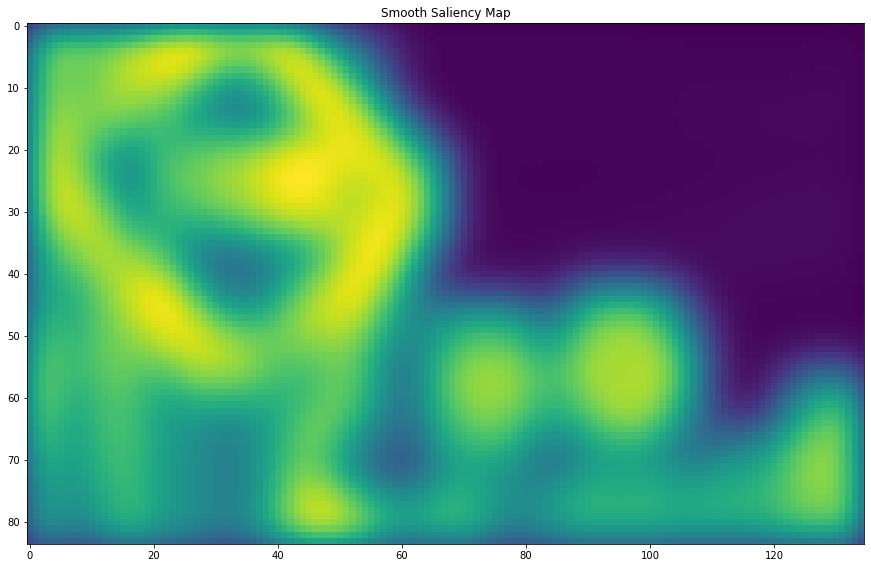

In [19]:
kernel = gaussian_filter(sal_map.shape[0], sal_map.shape[1], sigma=3)
sal_map_smooth = fftconvolve(sal_map, kernel, mode='same')

plt.figure(figsize=(15,10))
plt.title("Smooth Saliency Map")
plt.imshow(sal_map_smooth);

### Part 7

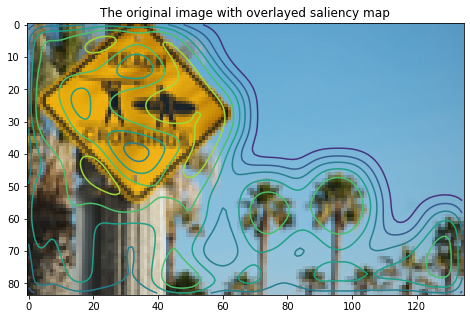

In [20]:
plt.figure(figsize=(10,5))
plt.title("The original image with overlayed saliency map")
plt.imshow(img[ignore_pixels:-(ignore_pixels+1), ignore_pixels:-(ignore_pixels+1)])
plt.contour(sal_map_smooth);

### Part 8 

<ipython-input-21-1e598c60612f>:6: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  (xmax, ymax) = np.unravel_index(np.argmax(sal_map_smooth.flatten()), dims=sal_map_smooth.shape)
<ipython-input-21-1e598c60612f>:7: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  (xmin, ymin) = np.unravel_index(np.argmin(sal_map_smooth.flatten()), dims=sal_map_smooth.shape)


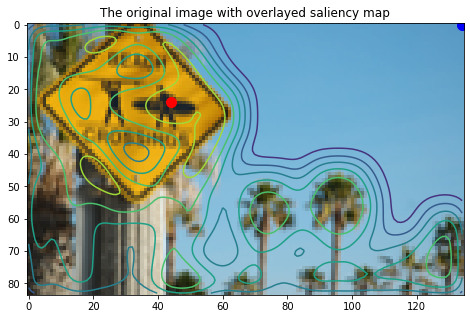

In [21]:
plt.figure(figsize=(10,5))
plt.title("The original image with overlayed saliency map")
plt.imshow(img[ignore_pixels:-(ignore_pixels+1), ignore_pixels:-(ignore_pixels+1)])
plt.contour(sal_map_smooth);

(xmax, ymax) = np.unravel_index(np.argmax(sal_map_smooth.flatten()), dims=sal_map_smooth.shape)
(xmin, ymin) = np.unravel_index(np.argmin(sal_map_smooth.flatten()), dims=sal_map_smooth.shape)
plt.plot(ymax, xmax, 'ro', ms = 10)
plt.plot(ymin, xmin, 'bo', ms = 10)

How do you interpret the complete images? The overlay shows the higher saliency 
with areas in green with more salinecy. The red dot is where one is most likely to see 
in this case the traffic sign with the surfer dude icon and the blue plain sky the least
likely place one would pay attention to.

### Part 9

Please outline in words how the information that subjects are much more likely to Ô¨Årst attend the center of an image, instead of the borders, could be included in the above saliency-map analysis to better predict eye-movements.

To the overlayed saliency map we could do a multivariate normal distribution to transform the 1-D to higher dimentions to cluster around a mean value in this case the eye iris. 